In [14]:
# Import necessary libraries
import torch
import matplotlib.pyplot as plt
from torch import nn

In [21]:
# Create the data parameters
weight = 0.3
bias = 0.9
# Make X and y using linear regression feature
X = torch.arange(0,200, dtype=torch.float32).unsqueeze(dim = 1)
y = weight * X + bias
print(f"Number of X samples: {len(X)}, dtype {X.dtype}")
print(f"Number of y samples: {len(y)}", dtype {y.dtype}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")


Number of X samples: 200, dtype torch.float32
Number of y samples: 200, dtype torch.float32
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0050],
        [0.0100],
        [0.0150],
        [0.0200],
        [0.0250],
        [0.0300],
        [0.0350],
        [0.0400],
        [0.0450]])
y: tensor([[0.9000],
        [0.9015],
        [0.9030],
        [0.9045],
        [0.9060],
        [0.9075],
        [0.9090],
        [0.9105],
        [0.9120],
        [0.9135]])


In [22]:
# Split the data into training and testing
train_split = int(len(X) * 0.8)
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(160, 160, 40, 40)

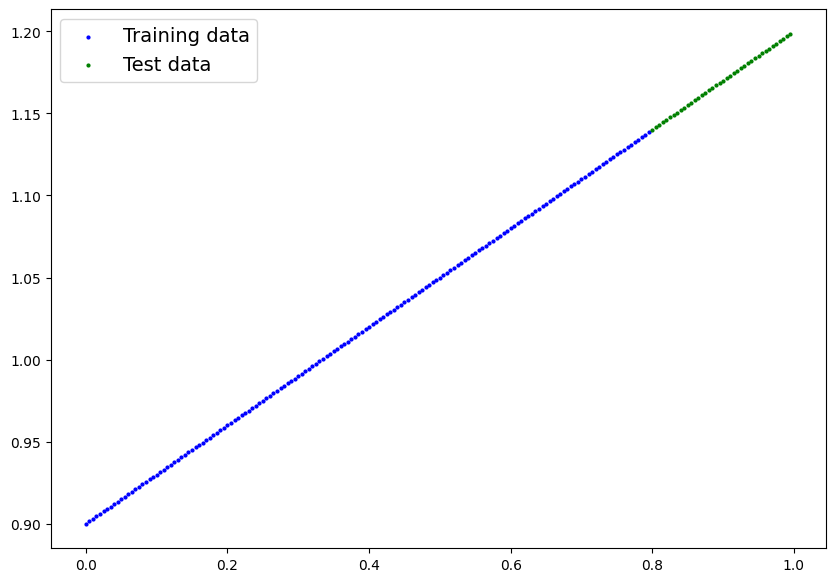

In [23]:
# Plot the training and testing data 
def plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data,train_labels,c = 'b',s = 4,label = "Training data")
  plt.scatter(test_data,test_labels,c = 'g',s = 4,label = "Test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c = 'r',s = 4,label = "Predictions")
  plt.legend(prop = {"size" : 14})
plot_predictions()
     

In [24]:
# Create PyTorch linear regression model by subclassing nn.Module
## Option 1
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(data=torch.randn(1, 
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))
    
    self.bias = nn.Parameter(data=torch.randn(1, 
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))

  def forward(self, x):
    return self.weight * x + self.bias

# ## Option 2
# class LinearRegressionModel(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.linear_layer = nn.Linear(in_features = 1,
#                                   out_features = 1)
#   def forward(self,x : torch.Tensor) -> torch.Tensor:
#     return self.linear_layer(x)
  
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1,model_1.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [25]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [26]:
# Training loop
# Train model for 300 epochs
torch.manual_seed(42)

epochs = 300

# Send data to target device
X_train = X_train
X_test = X_test
y_train = y_train
y_test = y_test

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred,y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:
    # Put model in evaluation mode and setup inference context 
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      y_preds = model_1(X_test)
      # 2. Calculate test loss
      test_loss = loss_fn(y_preds,y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.757 | Test loss: 0.725
Epoch: 20 | Train loss: 0.525 | Test loss: 0.453
Epoch: 40 | Train loss: 0.293 | Test loss: 0.182
Epoch: 60 | Train loss: 0.076 | Test loss: 0.074
Epoch: 80 | Train loss: 0.053 | Test loss: 0.116
Epoch: 100 | Train loss: 0.046 | Test loss: 0.106
Epoch: 120 | Train loss: 0.039 | Test loss: 0.090
Epoch: 140 | Train loss: 0.032 | Test loss: 0.074
Epoch: 160 | Train loss: 0.025 | Test loss: 0.058
Epoch: 180 | Train loss: 0.018 | Test loss: 0.042
Epoch: 200 | Train loss: 0.012 | Test loss: 0.026
Epoch: 220 | Train loss: 0.005 | Test loss: 0.010
Epoch: 240 | Train loss: 0.005 | Test loss: 0.009
Epoch: 260 | Train loss: 0.005 | Test loss: 0.009
Epoch: 280 | Train loss: 0.005 | Test loss: 0.009
